# Assignment 3 Classiying salary using various classification and prediction Methods


The documentation in this notebook accompanies indepth documentation in the a3 report.
First Load Requisite Libraries for use

In [1]:
import pandas as pd
import numpy as np

Load both train and test data as pandas dataframes and set the ID column as the index in both cases

In [2]:
dftrain = pd.read_csv('data/train.csv')
dftest = pd.read_csv('data/test-pub.csv')
dftrain.sort_index(inplace=True)
dftest.sort_index(inplace=True)

## Preprocessing
### Drop and Binarise columns
Drop education level as the attribute is already numerically encoded in the education years column.

Initially Final weight (fnlwgt) was dropped from the dataset however, adding the attribute back into the data actually improved classification by roughly an additional 2 points across most scoring metrics, Hence the Fnlwgt attribute is not removed at this stage, and will be MinMaxScaled later to avoid negative effects to logistic regression models

In [3]:
dftrain.drop('Education level', axis=1, inplace=True)
dftest.drop('Education level', axis=1, inplace=True)
dftrain.head()

,ID,Age,Employment class,Fnlwgt,Education years,Marital status,Occupation,Relationship status,Race,Sex,Capital gain,Capital loss,Work hours per week,Native country,Salary
0,40947,50,Private,104729,9,Divorced,Machine-op-inspct,Other-relative,White,Female,0,0,48,United-States,<=50K
1,17139,27,Private,138705,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,53,United-States,<=50K
2,29557,30,Private,144593,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
3,10344,40,Private,181015,9,Separated,Other-service,Unmarried,White,Female,0,0,47,United-States,<=50K
4,33206,52,Private,110563,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K


Binarise Columns with 'binary' options those columns being sex and Salary

In [4]:
dftrain['>50k'] = (dftrain['Salary'] == ' >50K').astype(int)
#Testing data has no attached salaries, 
dftrain['IsMale'] = (dftrain['Sex'] == ' Male').astype(int)
dftest['IsMale'] = (dftest['Sex'] == ' Male').astype(int)
dftrain.drop(['Sex','Salary'], axis=1, inplace=True)
dftest.drop(['Sex'], axis=1, inplace=True)
dftrain.head()

,ID,Age,Employment class,Fnlwgt,Education years,Marital status,Occupation,Relationship status,Race,Capital gain,Capital loss,Work hours per week,Native country,>50k,IsMale
0,40947,50,Private,104729,9,Divorced,Machine-op-inspct,Other-relative,White,0,0,48,United-States,0,0
1,17139,27,Private,138705,9,Married-civ-spouse,Craft-repair,Husband,White,0,0,53,United-States,0,1
2,29557,30,Private,144593,9,Never-married,Other-service,Not-in-family,Black,0,0,40,?,0,1
3,10344,40,Private,181015,9,Separated,Other-service,Unmarried,White,0,0,47,United-States,0,0
4,33206,52,Private,110563,10,Married-civ-spouse,Exec-managerial,Husband,White,0,0,40,United-States,1,1


With Successful Binarisation, Remove original Cateogorical values

### Preprocessing Categorical Variables

Start with Maritial status, First we create 3 distinct categories to reduce the amount of unique values. Then we use the get_dummies feature to add dummy columns and finally drop the original values.

In [5]:
#Reduce the number of categories.
dftrain['Marital status'] = dftrain['Marital status'].replace({' Divorced': 'Separated', 
                                                     ' Never-married': 'Never married',
                                                     ' Separated': 'Separated',
                                                     ' Widowed':'Separated',
                                                     ' Married-civ-spouse': 'Married',
                                                     ' Married-spouse-absent': 'Married',
                                                     ' Married-AF-spouse': 'Married',
                                                     ' Not Married': 'Never married'
                                                    })
dftest['Marital status'] = dftest['Marital status'].replace({' Divorced': 'Separated', 
                                                     ' Never-married': 'Never married',
                                                     ' Separated': 'Separated',
                                                     ' Widowed':'Separated',
                                                     ' Married-civ-spouse': 'Married',
                                                     ' Married-spouse-absent': 'Married',
                                                     ' Married-AF-spouse': 'Married',
                                                     ' Not Married': 'Never married'
                                                    })

In [6]:
#Create dummy columns, append to the original dataframes and remove the original marital status values
dftrain = pd.concat([dftrain, pd.get_dummies(dftrain['Marital status'])], axis=1)
dftest = pd.concat([dftest, pd.get_dummies(dftest['Marital status'])], axis=1)
dftrain.drop('Marital status', inplace=True, axis=1)
dftest.drop('Marital status', inplace=True, axis=1)
dftest.head()

,ID,Age,Employment class,Fnlwgt,Education years,Occupation,Relationship status,Race,Capital gain,Capital loss,Work hours per week,Native country,IsMale,Married,Never married,Separated
0,21990,24,Private,138768,12,Handlers-cleaners,Own-child,White,0,0,30,United-States,1,0,1,0
1,6594,28,Local-gov,214881,9,Craft-repair,Husband,White,0,0,40,United-States,1,1,0,0
2,18525,37,Private,177181,9,Craft-repair,Husband,White,0,0,40,United-States,1,1,0,0
3,23747,66,Private,350498,10,Sales,Husband,White,0,0,28,United-States,1,1,0,0
4,37752,34,Self-emp-not-inc,56460,9,Farming-fishing,Wife,White,0,2179,12,United-States,0,1,0,0


In [7]:
#Remove Relationship status, due to heavy relationship between marital status which is already captured#
dftrain.drop('Relationship status', inplace=True, axis=1)
dftest.drop('Relationship status', inplace=True, axis=1)

Next Field is employment class, a similar method will be used as with marital status, will be summarised as government, private or self employeed and then again dummy variables will be created

Next create the three cateogories for the data to go into, Being Government, Private or Self employeed

In [8]:
dftrain['Employment class'] = dftrain['Employment class'].replace({' Self-emp-not-inc':'SelfEmp',
                                                                   ' Self-emp-inc': 'SelfEmp',
                                                                   ' Local-gov': 'Gov',
                                                                   ' State-gov': 'Gov',
                                                                   ' Federal-gov': 'Gov',
                                                                   ' Never-worked': 'Private',
                                                                   ' Without-pay': 'Private',
                                                                   ' Private': 'Private'
                                                                  })
dftest['Employment class'] = dftest['Employment class'].replace({' Self-emp-not-inc':'SelfEmp',
                                                                   ' Self-emp-inc': 'SelfEmp',
                                                                   ' Local-gov': 'Gov',
                                                                   ' State-gov': 'Gov',
                                                                   ' Federal-gov': 'Gov',
                                                                   ' Never-worked': 'Private',
                                                                   ' Without-pay': 'Private',
                                                                   ' Private':'Private'
                                                                  })

In [9]:
#Get Dummy Variables adding those columns to the dataset.
dftrain = pd.concat([dftrain, pd.get_dummies(dftrain['Employment class'])], axis=1)
dftest = pd.concat([dftest, pd.get_dummies(dftest['Employment class'])], axis=1)
dftrain.drop('Employment class', inplace=True, axis=1)
dftest.drop('Employment class', inplace=True, axis=1)
dftest.head()

,ID,Age,Fnlwgt,Education years,Occupation,Race,Capital gain,Capital loss,Work hours per week,Native country,IsMale,Married,Never married,Separated,?,Gov,Private,SelfEmp
0,21990,24,138768,12,Handlers-cleaners,White,0,0,30,United-States,1,0,1,0,0,0,1,0
1,6594,28,214881,9,Craft-repair,White,0,0,40,United-States,1,1,0,0,0,1,0,0
2,18525,37,177181,9,Craft-repair,White,0,0,40,United-States,1,1,0,0,0,0,1,0
3,23747,66,350498,10,Sales,White,0,0,28,United-States,1,1,0,0,0,0,1,0
4,37752,34,56460,9,Farming-fishing,White,0,2179,12,United-States,0,1,0,0,0,0,0,1


Process the Native country column to reflect a 1 if the individual has an US background and a 0 if the person does not

In [10]:
#Define a simple function to detect whether or not an individual has a background as the united states, 
#Then apply that function to the datasets.
def country(s):
    if s == ' United-States':
        return 1
    else:
        return 0
dftrain['Native country'] = dftrain['Native country'].apply(country)
dftest['Native country'] = dftest['Native country'].apply(country)

Process the race variable, we found in assignment 2 that race was not strongly related to salary, Asian Pac Islander's had the highest salaries followed by whites and then fairly even distribution amongst other races.

In [11]:
#Using method identical to the way we handled marital status and employment status
dftrain['Race'] = dftrain['Race'].replace({' White':'White',
                                           ' Black':'BlackIndianOther',
                                           ' Asian-Pac-Islander':'AsianPac',
                                           ' Amer-Indian-Eskimo':'BlackIndianOther',
                                           ' Other': 'BlackIndianOther'
                                        })
dftest['Race'] = dftest['Race'].replace({' White':'White',
                                           ' Black':'BlackIndianOther',
                                           ' Asian-Pac-Islander':'AsianPac',
                                           ' Amer-Indian-Eskimo':'BlackIndianOther',
                                           ' Other': 'BlackIndianOther'
                                        })

In [12]:
dftrain = pd.concat([dftrain, pd.get_dummies(dftrain['Race'])], axis=1)
dftest = pd.concat([dftest, pd.get_dummies(dftest['Race'])], axis=1)
dftrain.drop('Race', inplace=True, axis=1)
dftest.drop('Race', inplace=True, axis=1)
dftest.head()

,ID,Age,Fnlwgt,Education years,Occupation,Capital gain,Capital loss,Work hours per week,Native country,IsMale,Married,Never married,Separated,?,Gov,Private,SelfEmp,AsianPac,BlackIndianOther,White
0,21990,24,138768,12,Handlers-cleaners,0,0,30,1,1,0,1,0,0,0,1,0,0,0,1
1,6594,28,214881,9,Craft-repair,0,0,40,1,1,1,0,0,0,1,0,0,0,0,1
2,18525,37,177181,9,Craft-repair,0,0,40,1,1,1,0,0,0,0,1,0,0,0,1
3,23747,66,350498,10,Sales,0,0,28,1,1,1,0,0,0,0,1,0,0,0,1
4,37752,34,56460,9,Farming-fishing,0,2179,12,1,0,1,0,0,0,0,0,1,0,0,1


Reduce the number of distinct occupations in the occupations field, First remove missing values, group values then create the final set of dummies

In [13]:
dftrain['Occupation'] = dftrain['Occupation'].replace({' Craft-repair': 'Trade',
                                                       ' Prof-specialty':'ProfSpec',
                                                       ' Exec-managerial':'ExecMan',
                                                       ' Adm-clerical':'AdminTech',
                                                       ' Sales': 'Sales',
                                                       ' Other-service':'Trade',
                                                       ' Machine-op-inspct':'Trade',
                                                       ' Transport-moving': 'Trade',
                                                       ' Handlers-cleaners':'OtherJob',
                                                       ' Farming-fishing':'Trade',
                                                       ' Tech-support': 'AdminTech',
                                                       ' Protective-serv':'OtherJob',
                                                       ' Priv-house-serv':'OtherJob',
                                                       ' Armed-Forces':'OtherJob'
                                                      })
dftest['Occupation'] = dftest['Occupation'].replace({' Craft-repair': 'Trade',
                                                       ' Prof-specialty':'ProfSpec',
                                                       ' Exec-managerial':'ExecMan',
                                                       ' Adm-clerical':'AdminTech',
                                                       ' Sales': 'Sales',
                                                       ' Other-service':'Trade',
                                                       ' Machine-op-inspct':'Trade',
                                                       ' Transport-moving': 'Trade',
                                                       ' Handlers-cleaners':'OtherJob',
                                                       ' Farming-fishing':'Trade',
                                                       ' Tech-support': 'AdminTech',
                                                       ' Protective-serv':'OtherJob',
                                                       ' Priv-house-serv':'OtherJob',
                                                       ' Armed-Forces':'OtherJob'
                                                      })
dftrain = pd.concat([dftrain, pd.get_dummies(dftrain['Occupation'])], axis=1)
dftest = pd.concat([dftest, pd.get_dummies(dftest['Occupation'])], axis=1)
dftrain.drop('Occupation', inplace=True, axis=1)
dftest.drop('Occupation', inplace=True, axis=1)
dftest.head()

,ID,Age,Fnlwgt,Education years,Capital gain,Capital loss,Work hours per week,Native country,IsMale,Married,...,AsianPac,BlackIndianOther,White,?,AdminTech,ExecMan,OtherJob,ProfSpec,Sales,Trade
0,21990,24,138768,12,0,0,30,1,1,0,...,0,0,1,0,0,0,1,0,0,0
1,6594,28,214881,9,0,0,40,1,1,1,...,0,0,1,0,0,0,0,0,0,1
2,18525,37,177181,9,0,0,40,1,1,1,...,0,0,1,0,0,0,0,0,0,1
3,23747,66,350498,10,0,0,28,1,1,1,...,0,0,1,0,0,0,0,0,1,0
4,37752,34,56460,9,0,2179,12,1,0,1,...,0,0,1,0,0,0,0,0,0,1


### Normalise and Scale the existing numeric attributes for use in the models
Scaling age, education years, capital gains and loss, work hours

To do this we create a function we can pass any pandas series through SkLearns Scaling algorithms and return back to the dataframe. We will apply this function to the Age, Education, Years and others. Because distribution is preserved we can revisit and apply different filters by simply changing the functions

In [14]:
from sklearn.preprocessing import MinMaxScaler

def MinMaxScale(x):
    MinMax = MinMaxScaler()
    x = x.reshape(-1,1)
    return MinMax.fit_transform(x)

In [15]:
dftrain['Age'] = MinMaxScale(dftrain['Age'].values)
dftest['Age'] = MinMaxScale(dftest['Age'].values)
dftrain['Education years'] = MinMaxScale(dftrain['Education years'].values)
dftest['Education years'] = MinMaxScale(dftest['Education years'].values)
dftrain['Work hours per week'] = MinMaxScale(dftrain['Work hours per week'].values)
dftest['Work hours per week'] = MinMaxScale(dftest['Work hours per week'].values)
dftrain['Fnlwgt'] = MinMaxScale(dftrain['Fnlwgt'].values)
dftest['Fnlwgt'] = MinMaxScale(dftest['Fnlwgt'].values)
#dftrain.head()

Now we only have 2 non processed data points, capital gain and loss. Create a binary value, 0 for no capital gain, no capital loss and 1 elsewhere

In [16]:
def changeCapital(x):
    return 0 if x == 0 else 1

In [17]:
dftrain['Capital gain'] = dftrain['Capital gain'].apply(changeCapital)
dftest['Capital gain'] = dftest['Capital gain'].apply(changeCapital)
dftrain['Capital loss'] = dftrain['Capital loss'].apply(changeCapital)
dftest['Capital loss'] = dftest['Capital loss'].apply(changeCapital)

In [18]:
dftest.head()

,ID,Age,Fnlwgt,Education years,Capital gain,Capital loss,Work hours per week,Native country,IsMale,Married,...,AsianPac,BlackIndianOther,White,?,AdminTech,ExecMan,OtherJob,ProfSpec,Sales,Trade
0,21990,0.095890,0.102586,0.733333,0,0,0.295918,1,1,0,...,0,0,1,0,0,0,1,0,0,0
1,6594,0.150685,0.167896,0.533333,0,0,0.397959,1,1,1,...,0,0,1,0,0,0,0,0,0,1
2,18525,0.273973,0.135547,0.533333,0,0,0.397959,1,1,1,...,0,0,1,0,0,0,0,0,0,1
3,23747,0.671233,0.284264,0.600000,0,0,0.275510,1,1,1,...,0,0,1,0,0,0,0,0,1,0
4,37752,0.232877,0.031960,0.533333,0,1,0.112245,1,0,1,...,0,0,1,0,0,0,0,0,0,1


## Preprocessing is now complete, we can begin to develop models

First we need to seperate our training data so that we can run quicker tests to verify the accuracy of the model. The test set provided does not have salary labels, so we would be unable to verify our model accuracy this way. This will be done using the sklearn train test split function

In [19]:
from sklearn.model_selection import train_test_split
#Split the train data into training and testing data, we are going for an 80% train 20% split on the dataset.
cols = dftrain.columns.values
cols = list(cols)
cols.remove('>50k')
cols.remove('ID')
x = dftrain[cols]
y = dftrain['>50k']
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2)

Create the roc_generator function to generate ROC curves for any Scikit learn model output: 

In [20]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')


def roc_generator(Xtest, Ytest, model_name):
    '''Given testing parameters for the dataset and the model name, produce a ROC curve 
    showcasing model accuracy rates'''
    #generate no skill prediction
    ns_probs = [0 for _ in range(len(Ytest))]
    model_probs = model_name.predict_proba(Xtest)
    model_probs = model_probs[:,1]
    #generate and print ROC score for the model
    model_auc = roc_auc_score(Ytest, model_probs)
    print('AUC score ', model_auc)
    
    #Generate roc curve
    nsFP, nsTP, _ = roc_curve(Ytest, ns_probs)
    ModelFP, ModelTP, _ = roc_curve(Ytest, model_probs)

    #plot the roc curve, using matplot lib, 

    plt.plot(nsFP, nsTP, linestyle='--', label='No Skill')
    plt.plot(ModelFP, ModelTP, label='Model')
    plt.xlabel('False Positive')
    plt.ylabel('True Positive')
    plt.legend()
    plt.show()

Code above creates the dataset to evaluated to generate a score on kaggle, next code starting on line 5 create's a function which takes our testing data set and the results of prediction to generate the CSV file needed to submit on kaggle

In [21]:
testcols = list(dftest.columns.values)
testcols.remove('ID')
kaggletestset = dftest[testcols]

def printoutput(df, results):
    results = pd.DataFrame(results)
    final = df.join(results)
    output = final[['ID',1]]
    output.to_csv('ModelPredicts.csv', index=False)

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Classification, Decision Tree, Random Forest, Bernoulli & Logistic Regression

For our predictive modelling first we will use a DecisionTreeClassifer to predict salaries. We will generate a ROC curve and view its accuracy and confusion matrix

Accuracy:  0.9132894736842105
[[5407  336]
 [ 323 1534]]
AUC score  0.8837787680181188


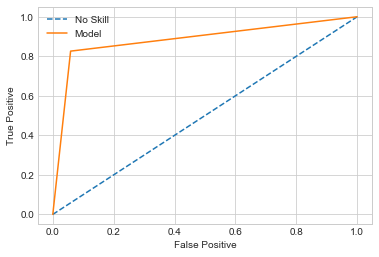

In [23]:
#Import DecisionTreeClassifier Module
from sklearn.tree import DecisionTreeClassifier
#Construct the Decision Tree object and add parameters if requried
DCclf = DecisionTreeClassifier()
#Fit the model to the training data
DCclf.fit(X_train, Y_train)
#Predict based on testing data
y_pred_DC = DCclf.predict(X_test)
#Get an accuracy score for the model
print("Accuracy: ",accuracy_score(Y_test, y_pred_DC))
#Get a confusion matrix for the model
print(confusion_matrix(Y_test, y_pred_DC))
#use our ROC generator function to create the curve
roc_generator(X_test, Y_test, DCclf)

Take output of our model and write to a csv file for uploading to kaggle

In [24]:
output = pd.DataFrame(DCclf.predict_proba(kaggletestset))

printoutput(dftest, output)

0.88619 this current implementation scores a < on kaggle

Lets run some parameter tuning on the decision tree classifier to see if we can generate a better result

Accuracy:  0.868421052631579
[[5360  383]
 [ 617 1240]]
AUC score  0.8971607494633489


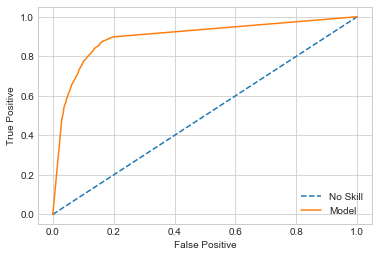

In [25]:
#Construct the Decision Tree object and add parameters if requried
DCclf = DecisionTreeClassifier(criterion='gini',splitter='best',
                               min_samples_split=6, min_samples_leaf=2, max_depth=18) 
#Fit the model to the training data
DCclf.fit(X_train, Y_train)
#Predict based on testing data
y_pred_DC = DCclf.predict(X_test)
#Get an accuracy score for the model
print("Accuracy: ",accuracy_score(Y_test, y_pred_DC))
#Get a confusion matrix for the model
print(confusion_matrix(Y_test, y_pred_DC))
#use our ROC generator function to create the curve
roc_generator(X_test, Y_test, DCclf)

Whilst the model loses us some accuracy the AUC score is know higher than the accuracy, reducing some over fitting.
Export the output to a csv file

In [26]:
output = pd.DataFrame(DCclf.predict_proba(kaggletestset))

printoutput(dftest, output)

### Random forest algorithm implementation 
Implementing the random forrest algorithm to try and improve on original decision tree learner

Accuracy:  0.9285526315789474
[[5528  215]
 [ 328 1529]]
AUC score  0.9701152891427096


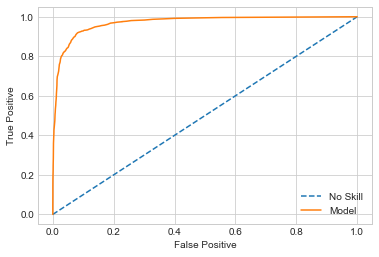

In [27]:
from sklearn.ensemble import RandomForestClassifier
#Initalise the model
RFclf = RandomForestClassifier()
RFclf.fit(X_train, Y_train)
#Get predicted values for accuracy and confusion matrix.
y_pred_RF = RFclf.predict(X_test)
#Get an accuracy score for the model
print("Accuracy: ",accuracy_score(Y_test, y_pred_RF))
#Get a confusion matrix for the model
print(confusion_matrix(Y_test, y_pred_RF))
#use our ROC generator function to create the curve
roc_generator(X_test, Y_test, RFclf)

In [34]:
output = pd.DataFrame(RFclf.predict_proba(kaggletestset))

printoutput(dftest, output)

The random forest classifier performs significantly better by increasing accuracy and model scoring


### Naive Bayes
Using the naive bayes bernoulli algorithm against our training data

Accuracy:  0.8022368421052631
[[4839  904]
 [ 599 1258]]
AUC score  0.8614221279052836


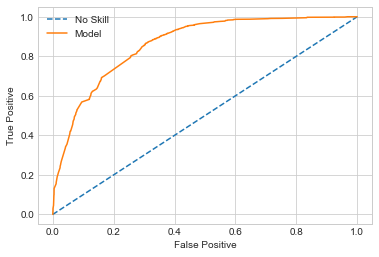

In [29]:
from sklearn.naive_bayes import BernoulliNB
#Initalise the model
BNBclf = BernoulliNB()
BNBclf.fit(X_train, Y_train)
#Get predicted values for accuracy and confusion matrix.
y_pred_BNB = BNBclf.predict(X_test)
#Get an accuracy score for the model
print("Accuracy: ",accuracy_score(Y_test, y_pred_BNB))
#Get a confusion matrix for the model
print(confusion_matrix(Y_test, y_pred_BNB))
#use our ROC generator function to create the curve
roc_generator(X_test, Y_test, BNBclf)

Naive bayes performs worse then previous classifiers, the dataset is not perfectly prepared for a bernoulli implementation and it is reflected in the results, since we have scaled our data points lets try a linear model

### Logistic Regression
Implement a logistic regression model to run against our data and visualise in the same manor

Accuracy:  0.8394736842105263
[[5335  408]
 [ 812 1045]]
AUC score  0.8980594108573187


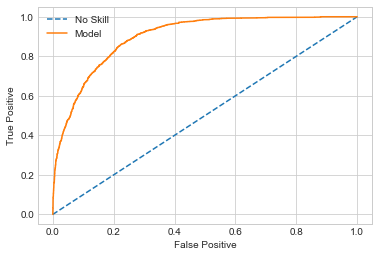

In [30]:
from sklearn.linear_model import LogisticRegression

#Initalise Model
LRclf = LogisticRegression(solver='liblinear', C=0.1)
LRclf.fit(X_train, Y_train)
#Get predicted values for accuracy and confusion matrix.
y_pred_LR = LRclf.predict(X_test)
#Get an accuracy score for the model
print("Accuracy: ",accuracy_score(Y_test, y_pred_LR))
#Get a confusion matrix for the model
print(confusion_matrix(Y_test, y_pred_LR))
#use our ROC generator function to create the curve
roc_generator(X_test, Y_test, LRclf)


Logistic regression is an improvement on Bayes but does not superceed that of the original random forest method. Its false negative rate is especially high compared to other methods

Use the jupyter notebook %%time magic to evaluate the performance of the classifiers used, for some minor evaluation

In [44]:
%%time
y_pred_RF = RFclf.predict(X_test)
print(y_pred_RF)

[1 1 1 ... 0 0 0]
Wall time: 378 ms


In [45]:
%%time
y_pred_LR = LRclf.predict(X_test)
print(y_pred_LR)

[0 1 1 ... 0 0 0]
Wall time: 9.94 ms
